# TP 3
#### Para la imagen suministrada "eyes” (por ninguna razón en especial, con heterocromía), implementar un algoritmo que:
1. Encuentre la posición de los iris en cada par de ojos y mida su distancia en píxeles.
2. Encuentre la posición de las pupilas en cada par de ojos y mida su distancia en píxeles.

In [1]:
%matplotlib inline  

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Función para medir la distancia entre los centros de pares de círculos
def distance_meter (cicles_array):
    left_eyes = np.zeros(np.uint8(cicles_array.shape[1]/2), dtype = int)
    right_eyes = np.zeros(np.uint8(cicles_array.shape[1]/2), dtype = int)
    # Ordena los círculos de acuerdo a su posición en el eje y de la imagen (columnas de la matriz)
    order_cicles = np.argsort(cicles_array[0,:,1])
    # Asocia en pares dos círculos ubicados en aproximadamente la misma posición en el eje y de la imagen
    # cada par se compone por ojo izq y ojo derecho
    odd = np.arange(0,cicles_array.shape[1],2)
    even = odd + 1
    left_eyes = cicles_array[0,order_cicles[odd],0]
    right_eyes = cicles_array[0,order_cicles[even],0]
    # Resta las posición x en la imagen correspondiente a cada par iqz-der
    distance =np.absolute(np.int16(right_eyes-left_eyes))
    return distance

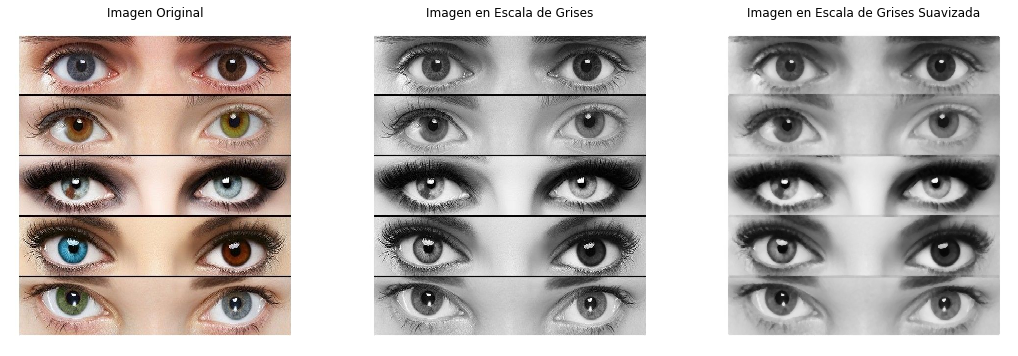

True

In [3]:
# Carga de imagen
img_BGR = cv.imread('images/eyes.jpg')
img_RGB = cv.cvtColor(img_BGR,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_BGR,cv.COLOR_BGR2GRAY)

# Suavizado de la imagen con un filtro de mediana
# img_gray = cv.GaussianBlur(eye_gray,ksize=(3,3),sigmaX=1)
img_gray_soft = cv.medianBlur(img_gray,5)

fig, ax = plt.subplots(1,3,figsize=(18,6)) 

ax[0].set_title("Imagen Original")
ax[0].imshow(img_RGB,aspect='auto')
ax[0].axis('off')
ax[1].set_title("Imagen en Escala de Grises")
ax[1].imshow(img_gray,aspect='auto',cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')
ax[2].set_title("Imagen en Escala de Grises Suavizada")
ax[2].imshow(img_gray_soft,aspect='auto',cmap='gray', vmin=0, vmax=255)
ax[2].axis('off')
plt.show()

cv.imwrite('images/filtered_gray_eyes.jpg', img_gray_soft) 


## Transformada de Hough Círculos
### Detección de iris


Las distancias medidas en pixeles entre los iris de cada par de ojos son las siguientes:

Par nro. 1 : 306
Par nro. 2 : 316
Par nro. 3 : 310
Par nro. 4 : 332
Par nro. 5 : 334


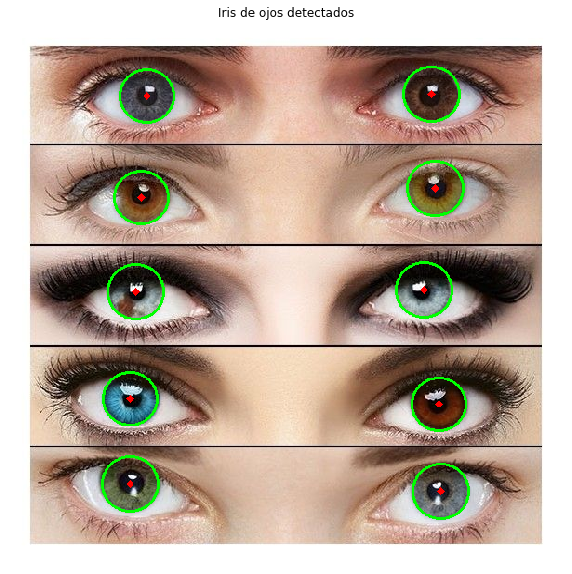

In [4]:
img_iris = img_RGB.copy()
iris_circles = cv.HoughCircles(img_gray_soft,       # imagen en grises
                                cv.HOUGH_GRADIENT,  # método
                                1,                  # flag de resolución del acumulador
                                90,                # dist mín entre centros de círculos
                                param1=200,         # umbral alto para Cany
                                param2=15,          # umbral del acumulador
                                minRadius=28,       # radio_min
                                maxRadius=31)       # radio_max
iris_circles = np.uint16(np.around(iris_circles))
for i in iris_circles[0,:]:
    # draw the outer circle
    cv.circle(img_iris,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img_iris,(i[0],i[1]),2,(255,0,0),3)

fig, ax = plt.subplots(1,1,figsize=(10,10)) 
ax.set_title('Iris de ojos detectados')
ax.imshow(img_iris,aspect='auto')
ax.axis('off')
fig.savefig('images/eyes_iris_cicles.jpg')

distance = distance_meter(iris_circles)
print('\nLas distancias medidas en pixeles entre los iris de cada par de ojos son las siguientes:\n')
for i in range(distance.shape[0]):
    print('Par nro. {} : {}'.format(i+1, distance[i]))

### Detección de pupilas


Las distancias medidas en pixeles entre las pulilas de cada par de ojos son las siguientes:

Par nro. 1 : 304
Par nro. 2 : 316
Par nro. 3 : 308
Par nro. 4 : 326
Par nro. 5 : 332


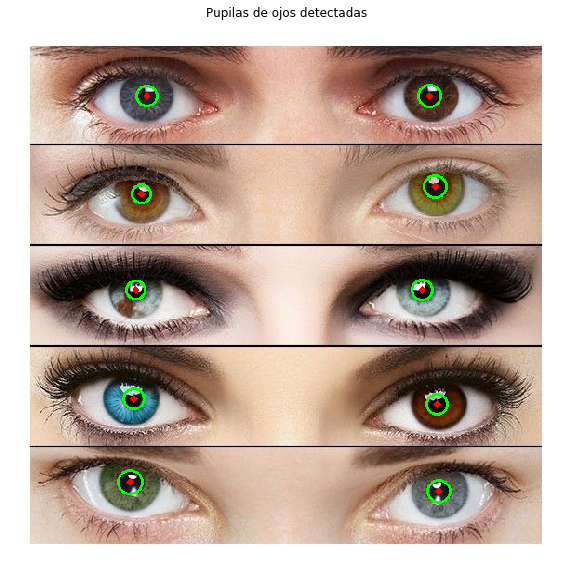

In [6]:
img_pupils = img_RGB.copy()
pupils_circles = cv.HoughCircles(img_gray_soft,   # imagen en grises
                                cv.HOUGH_GRADIENT,  # método
                                1,                  # flag de resolución del acumulador
                                90,                 # dist mín entre centros de círculos
                                param1=160,         # umbral alto para Cany
                                param2=15,          # umbral del acumulador
                                minRadius=10,       # radio_min
                                maxRadius=15)       # radio_max
                                
pupils_circles = np.uint16(np.around(pupils_circles))
for i in pupils_circles[0,:]:
    # draw the outer circle
    cv.circle(img_pupils,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img_pupils,(i[0],i[1]),2,(255,0,0),3)

fig, ax = plt.subplots(1,1,figsize=(10,10)) 
ax.set_title('Pupilas de ojos detectadas')
ax.imshow(img_pupils,aspect='auto')
ax.axis('off')
fig.savefig('images/eyes_pupils_cicles.jpg')

distance = distance_meter(pupils_circles)
print('\nLas distancias medidas en pixeles entre las pulilas de cada par de ojos son las siguientes:\n')
for i in range(distance.shape[0]):
    print('Par nro. {} : {}'.format(i+1, distance[i]))